*Notebook de análise exploratória dos dados (EDA) a partir dos dados de compradores de esteiras. Os dados foram utilizados a partir de recomendações no kaggle, pela relatividade facilidade de manipular a base. O csv utilizado está disponível em: https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness*
Data: 03/06/2022

<h3><b> Exploração da tabela </b> </h3>

In [2]:
#Importando as bibliotecas utilizadas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
#Abrindo o arquivo csv
df=pd.read_csv('CardioGoodFitness.csv', )

In [4]:
#Abrindo as primeias linhas do arquivo para verificar a integridade das informações
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
#Verificando o tamanho do dataframe e as informações sobre o mesmo
print(df.shape)
df.info()

(180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Obtendo nomes das colunas
print(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [7]:
#Verificando se existem valores nulos em cada coluna
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Início da análise exploratória. O primeiro passo é identificar os valores unitários de cada uma das variáveis para responder algumas perguntas como: 

1) Quais são os modelos de esteiras disponíveis?
2) Quantos dias na semana as pessoas esperam usar a esteira?
3) O quão "fitness" são as pessoas que usam a esteira, segundo sua própria visão?
4) Quais os níveis de escolaridade (em anos de aprendizado) dos clientes que compram as esteiras?
5) Quais as idades dos clientes?

No processo, faço variáveis de iteração para responder as perguntas. Perguntas a partir de variáveis categóricas são respondidas com as categorias disponíveis, perguntas em variáveis numéricas tem como resposta os valores mínimos e máximos inputados.

In [8]:
#Para variáveis categóricas
list_cat=['Product', "Fitness", "Usage"]

for item in list_cat:
    print('{}:{}'.format(item.upper(), df[item].unique()))

PRODUCT:['TM195' 'TM498' 'TM798']
FITNESS:[4 3 2 1 5]
USAGE:[3 2 4 5 6 7]


In [9]:
#Para variáveis numéricas
list_num=['Education', 'Age']

for item in list_num:
    print('{}: max = {}, min = {}.'.format(item.upper(), df[item].max(), df[item].min()))

EDUCATION: max = 21, min = 12.
AGE: max = 50, min = 18.


Logo, é possível verificar:
-   Existem 3 modelos de esteira na database
-   A maior parte das pessoas se considera um 4/5 em fitness
-   A maioria das pessoas utiliza a esteira 3 vezes na semana, seguidas pelas que usam 2 vezes na semana
-   As pessoas com maior índice de escolaridade estudaram por 21 anos, as com menor tiveram 12 anos de estdo
-   A pessoas mais nova na base tem 18 anos, a mais velha tem 50

In [10]:
#Resumo estatístico dos dados
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Algumas informações úteis a partir dos resumos estatísticos:
-   A idade média dos usuários das esteiras é de 28 anos e ainda que a idade máxima seja 50 anos, 75% dos usuários tem menos de 33 anos.
-   A média de uso das esteiras é de 3 dias
-   A média de ganho de renda dos usuários é de pouco menos de U$54.000 anuais
-   Os clientes correm em média pouco mais de 103 milhas por semana

In [11]:
#Quantidade de cada modelo de esteira
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [12]:
#Qual é a proporção entre homens e mulheres que compram a esteira?
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [13]:
#O estilo de compra e uso da esteira muda entre homens e mulheres?

print('Homens:')
df[df['Gender'] == 'Male'].describe()

Homens:


,Age,Education,Usage,Fitness,Income,Miles
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,28.951923,15.701923,3.653846,3.519231,56562.759615,112.826923
std,7.377978,1.728571,1.095172,0.994946,18421.687779,54.702451
min,18.000000,12.000000,2.000000,1.000000,29562.000000,42.000000
25%,23.750000,14.000000,3.000000,3.000000,45480.000000,85.000000
50%,26.000000,16.000000,4.000000,3.000000,52302.000000,100.000000
75%,34.000000,16.000000,4.000000,4.000000,61611.250000,141.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [14]:
print("Mulheres:")
df[df['Gender'] == 'Female'].describe()

Mulheres:


,Age,Education,Usage,Fitness,Income,Miles
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,28.565789,15.394737,3.184211,3.026316,49828.907895,90.013158
std,6.342104,1.442950,1.016012,0.832245,12557.690428,44.782882
min,19.000000,13.000000,2.000000,1.000000,30699.000000,21.000000
25%,24.000000,14.000000,2.000000,3.000000,42921.750000,66.000000
50%,26.500000,16.000000,3.000000,3.000000,47754.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53796.000000,100.000000
max,50.000000,21.000000,6.000000,5.000000,95866.000000,280.000000


O estilo de uso é bem semelhante entre homens e mulheres, a principal diferença está na renda anual e nas milhas percorridas por semana

<h3> <b> Visualização de dados </b> </h3>

*A visualização dos dados em gráficos ajuda a ver melhor algumas relações e estabelecer possíveis novas referências. Primeiro é realizada a visualização individual dos dados das variáveis numéricas contínuas; para esse caso as imagens ajudam a entender a distribuição dos dados e a existência de possíveis outliers.*

In [23]:
def univariate_analysis(data):
 #Essa função foi realizada a partir de uma função feita pela usuária Yogita Darate, no Kaggle. 
    Name=data.name
    fig, axes = plt.subplots(1,2,figsize=(17, 7))
    fig.suptitle("Distribuição dos dados para a variável "+ Name  , fontsize=18, fontweight='bold')
    sns.histplot(data,kde=True,color='Black',ax=axes[0], alpha=0.5)
    axes[0].axvline(data.mean(), color='y', linestyle='dashed',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='b',linestyle='dashed',linewidth=2)
    axes[0].legend({'Média':data.mean(),'Mediana':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="gray",ax=axes[1])


      

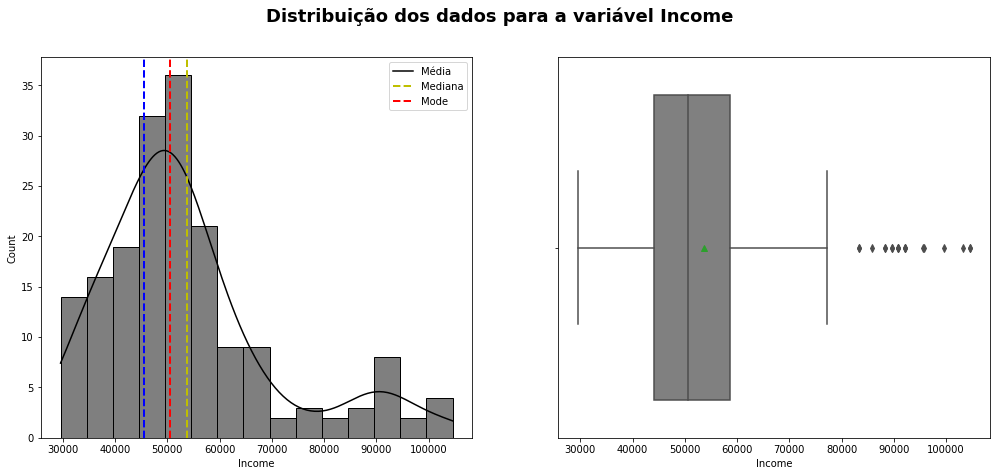

In [24]:
univariate_analysis(df.Income)

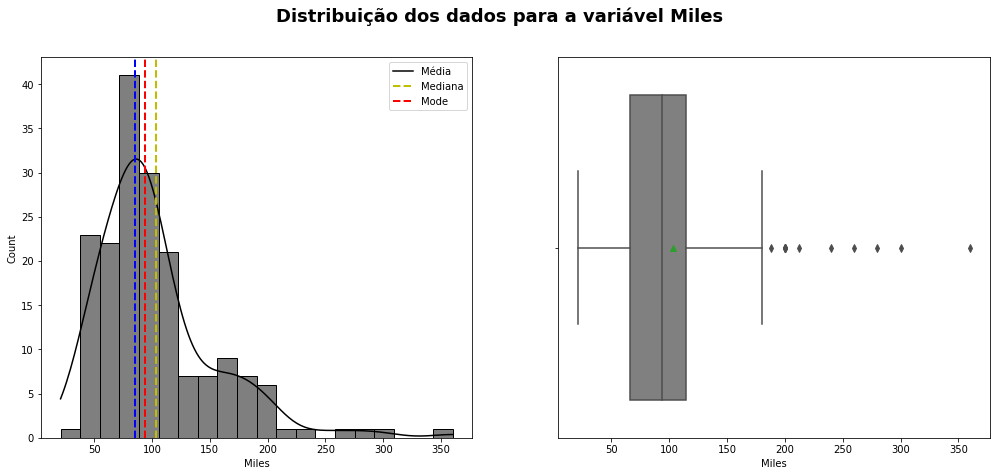

In [25]:
univariate_analysis(df.Miles)

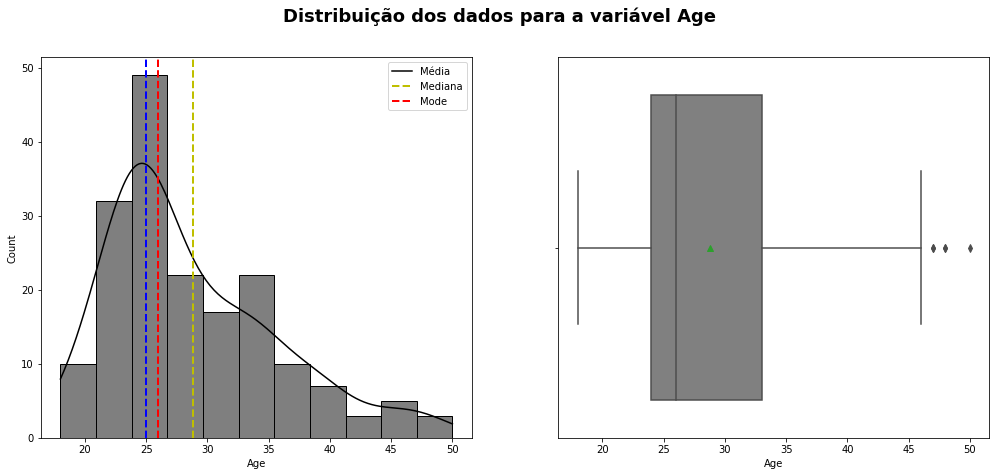

In [26]:
univariate_analysis(df.Age)

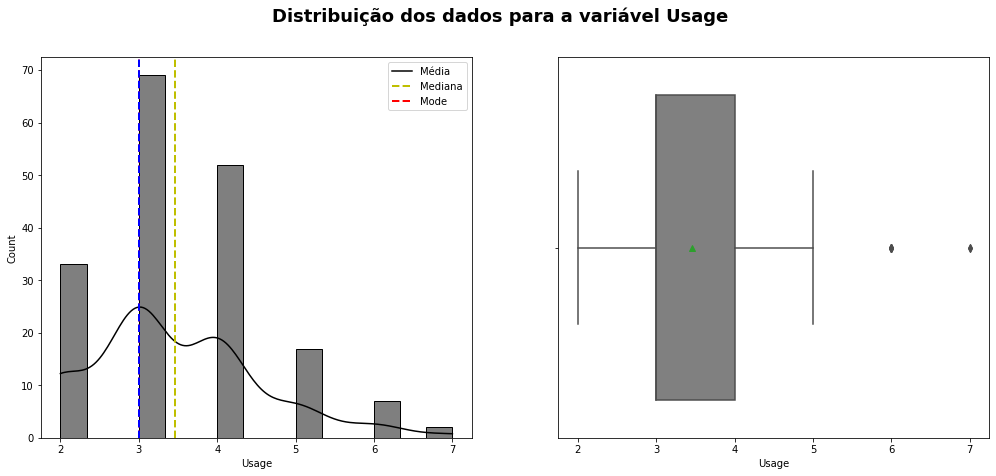

In [27]:
univariate_analysis(df.Usage)

-   A distribuição da renda tem cauda para direita, a maior parte da renda flutua entre U$45.000 e U$60.000 mas existe um número considerável de outliers
-   A maioria dos usuários percorre entre 75 e 125 milhas por semana, uma quantidade notável de usuários percorre 200 milhas ou mais
-   A grande maioria dos usuários tem entre 22 e 32 anos
-   Os usuários costumam usar a esteira 3 ou 4 dias na semana. Um número muito reduzido de usuários utiliza a esteira mais que 5 dias na semana